# LAB | Evaluation Unsupervised Learning
- This lab is designed to help you practice and solidify your ability to analyze the results of unsupervised models.

## Import libraries here

In [ ]:
# Your code here

In [51]:
import pandas as pd

# Wine dataset

## Load dataset
- Run the code below to import the dataset and separate X and y
```python
from sklearn import datasets
data = datasets.load_wine()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])
```

In [ ]:
# Your code here

In [52]:
from sklearn import datasets
data = datasets.load_wine()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## Train a KMeans clustering model with 8 clusters
- Use the X variable from the wine dataset
- Standardize the features
- Use 8 clusters, set `n_clusters=8` for the kmean model
```python
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
```

In [ ]:
# Your code here

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [56]:
X_std = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_std)

KMeans()

### Silhouette with 8 clusters
- Print the silhouette for the model
- Compute the silhouette score for the model
```python
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
```

In [ ]:
# Your code here

In [44]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [57]:
score_silh = silhouette_score(X_std, kmeans.predict(X_std))
print(f'8 clusters - silhouette score: {score_silh}')

8 clusters silhouette score: 0.12946211067530494


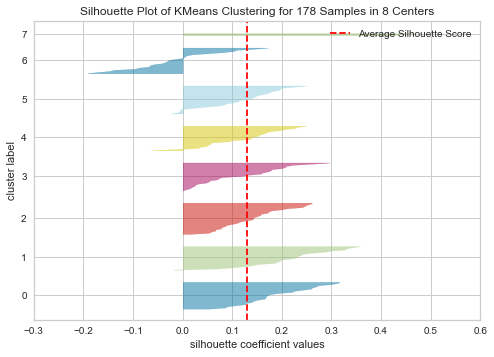

In [58]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_std)
visualizer.show() 

## Train a KMeans clustering model with 5 clusters
- Use the X variable from the wine dataset
- Standardize the features
- Use 5 clusters, set `n_clusters=5` for the kmean model

In [60]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_std)

KMeans(n_clusters=5)

### Silhouette with 5 clusters
- Print the silhouette for the model
- Compute the silhouette score for the model

In [61]:
score_silh = silhouette_score(X_std, kmeans.predict(X_std))
print(f'5 clusters - silhouette score: {score_silh}')

5 clusters silhouette score: 0.18098586816107426


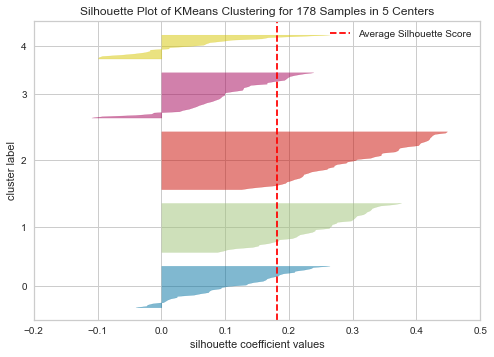

In [62]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_std)
visualizer.show() 

## Train a KMeans clustering model with 3 clusters
- Use the X variable from the wine dataset
- Standardize the features
- Use 5 clusters, set `n_clusters=3` for the kmean model

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)

KMeans(n_clusters=3)

### Silhouette with 3 clusters
- Print the silhouette for the model
- Compute the silhouette score for the model

In [65]:
score_silh = silhouette_score(X_std, kmeans.predict(X_std))
print(f'3 clusters - silhouette score: {score_silh}')

3 clusters silhouette score: 0.2848589191898987


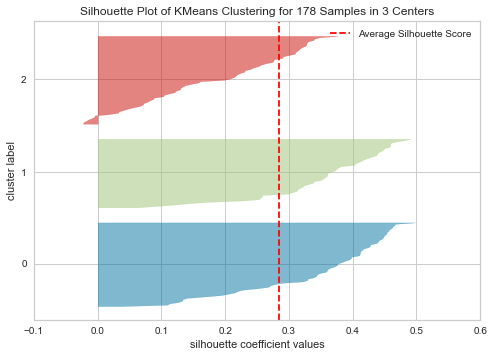

In [66]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_std)
visualizer.show() 

## Elbow curve
- Use elbow curve visualizations to see if you can determine the best number of clusters to use. 
- The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:
>- **distortion**: mean sum of squared distances to centers
>- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
>- **calinski_harabasz**: ratio of within to between cluster dispersion
```python
from yellowbrick.cluster import KElbowVisualizer
```

In [69]:
# Your code here

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

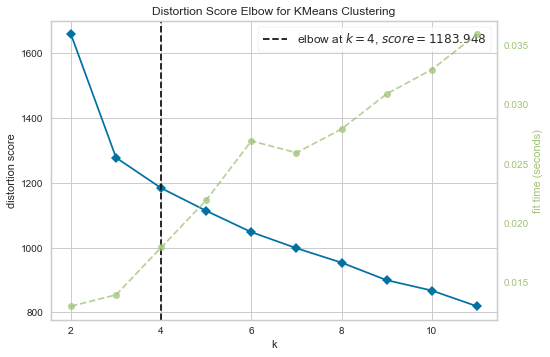

In [71]:
#distortion
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion')
visualizer.fit(X_std)
visualizer.poof()

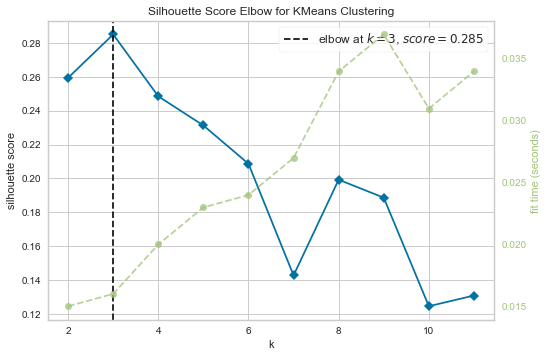

In [72]:
#silhouette
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')
visualizer.fit(X_std)
visualizer.poof()

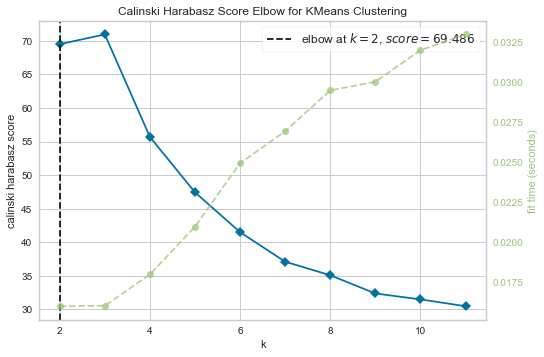

In [76]:
#calinski_harabaz
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz')
visualizer.fit(X_std)
visualizer.poof()

## Create and plot a scatter matrix
- Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data
- Use the model and number of clusters that returned the best result above.

In [79]:
import seaborn as sns

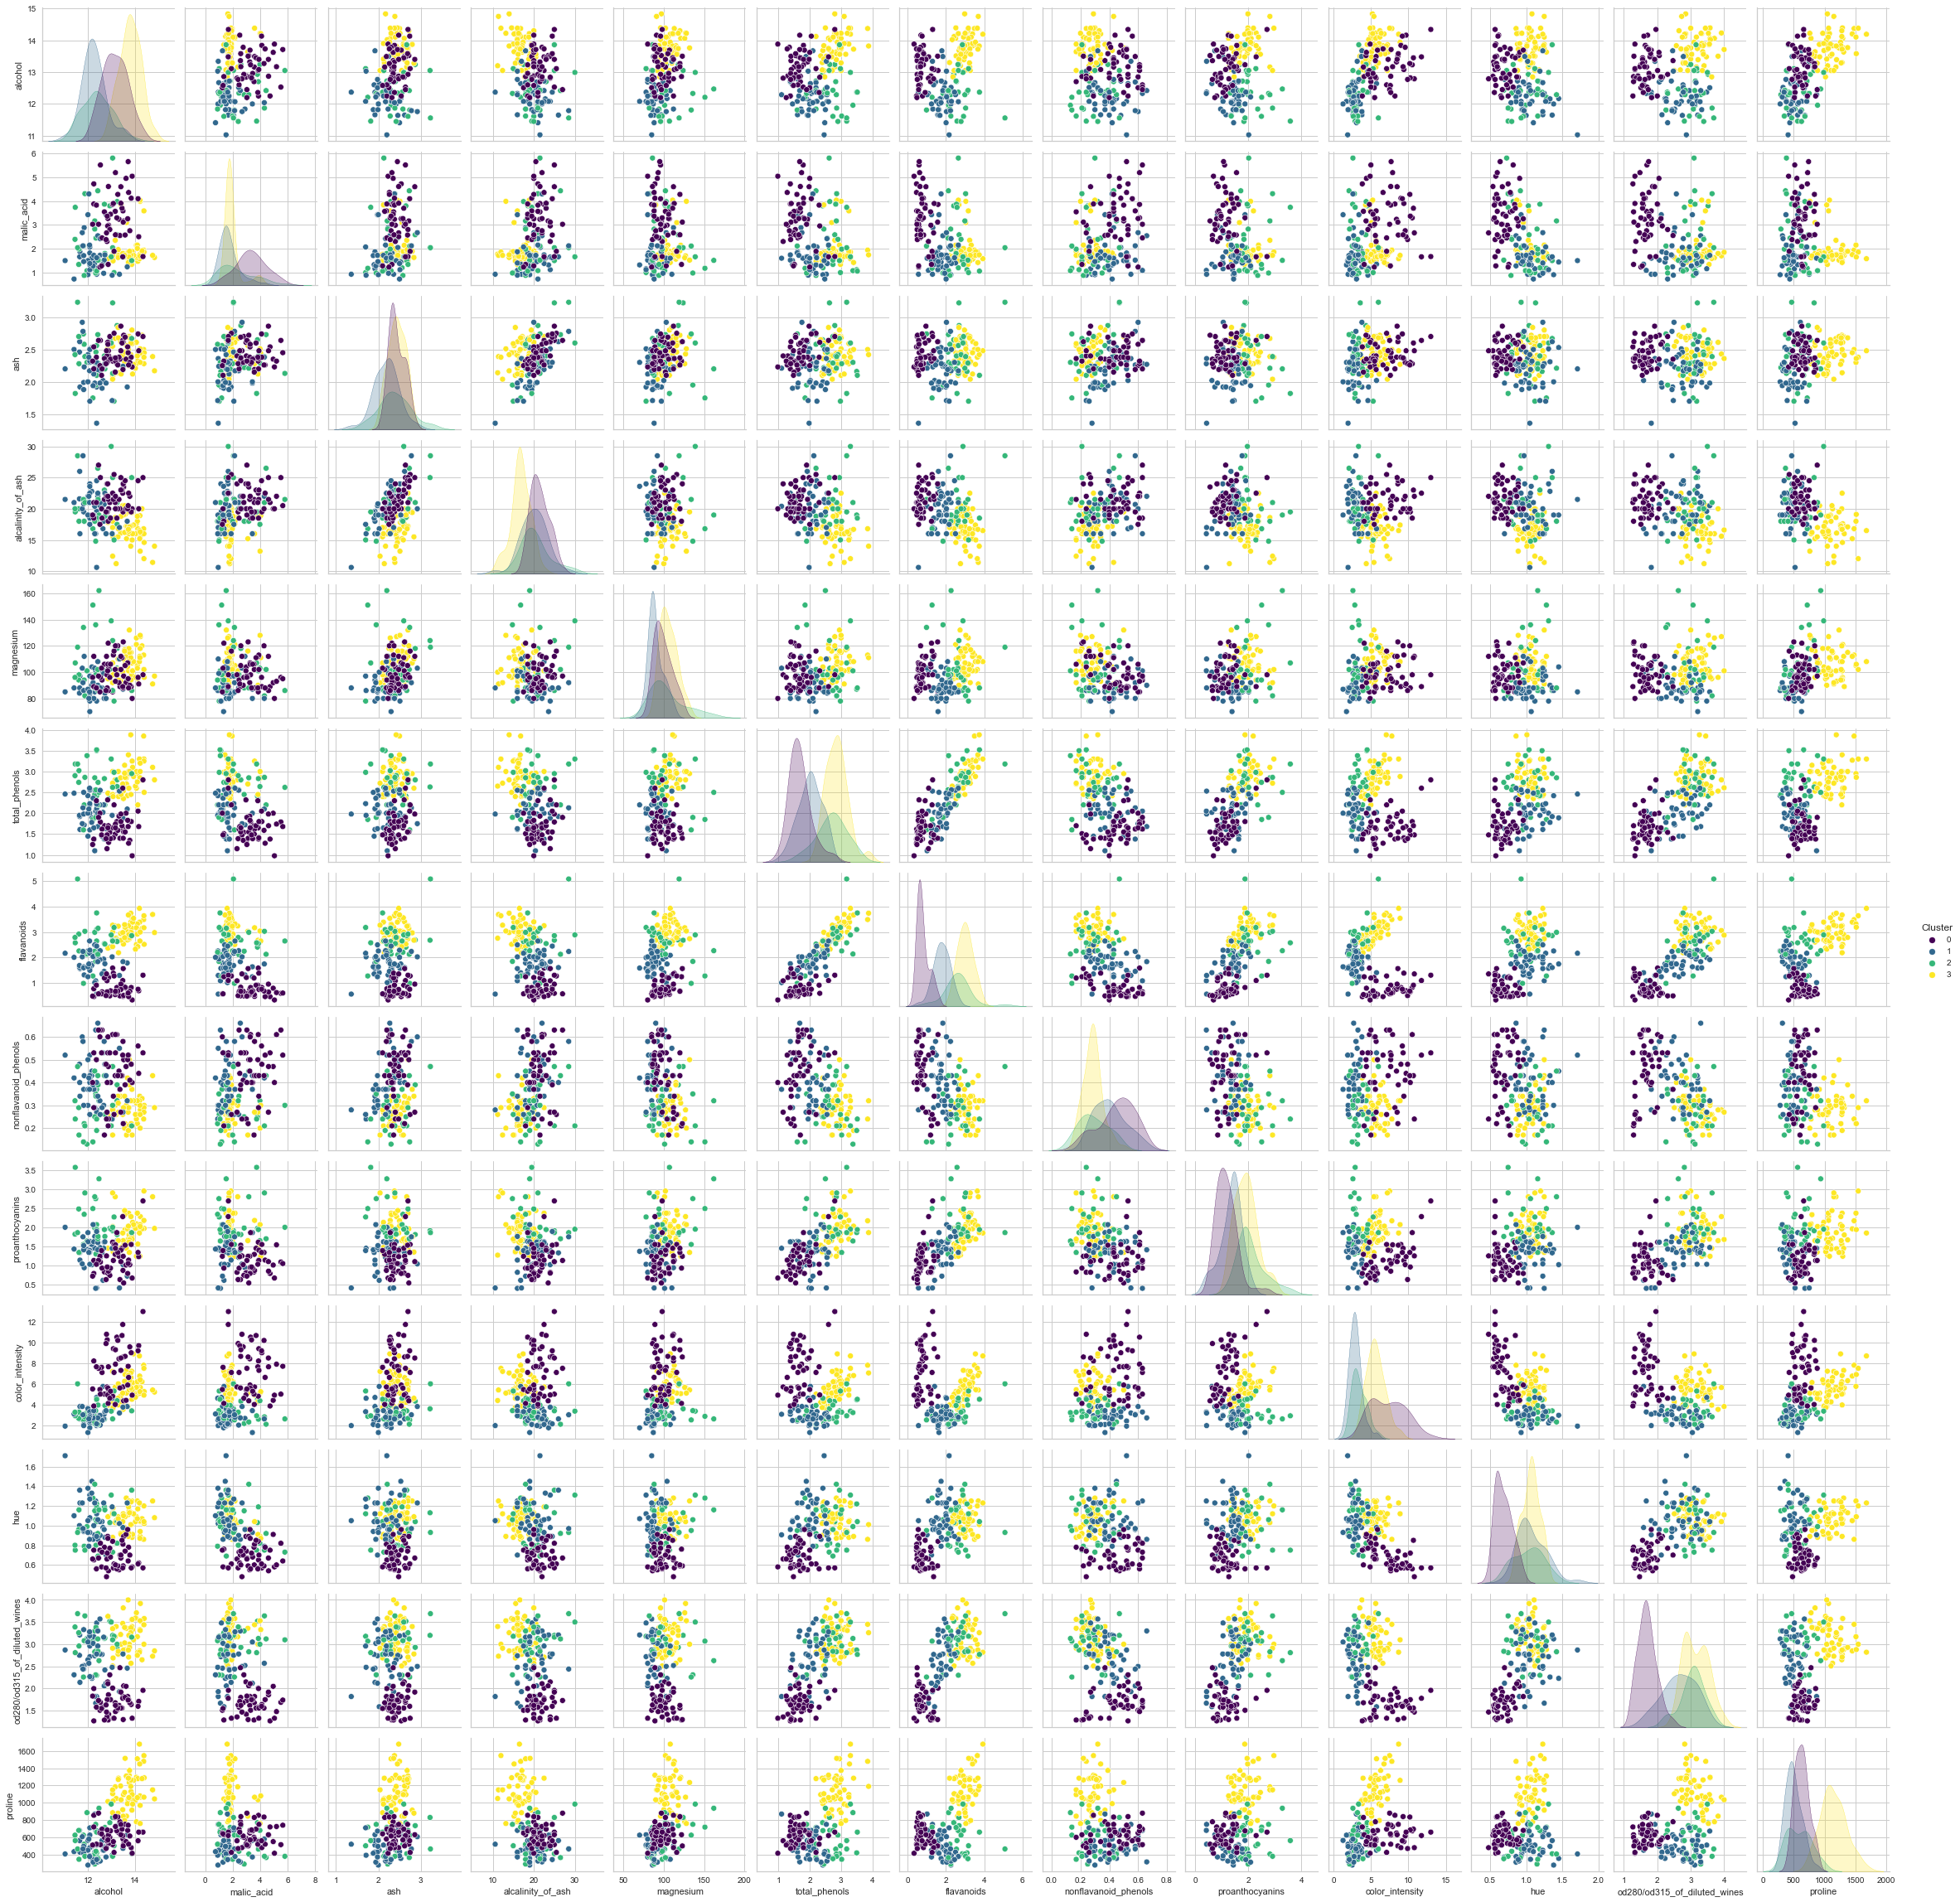

In [81]:
df_data = pd.DataFrame(X, columns=data['feature_names'])
model = KMeans(n_clusters=4)
model.fit(X_std)
df_data['Cluster'] = model.predict(X_std)
sns.pairplot(df_data, hue='Cluster', vars=df_data.columns[:-1], palette='viridis')

## Apply a PCA transform
- Apply a PCA transform
- Plot the first two principal components with the hue by cluster
```python
from sklearn.decomposition import PCA
```

In [82]:
# Your code here

In [83]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(n_components=2)
pca.fit(X_std)
pca_x = pca.transform(X_std)
pca_df = pd.DataFrame(pca_x, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, df_data['Cluster']], axis=1)

In [95]:
pca_df.head()

,PC1,PC2,Cluster
0,3.316751,-1.443463,3
1,2.209465,0.333393,3
2,2.516740,-1.031151,3
3,3.757066,-2.756372,3
4,1.008908,-0.869831,2


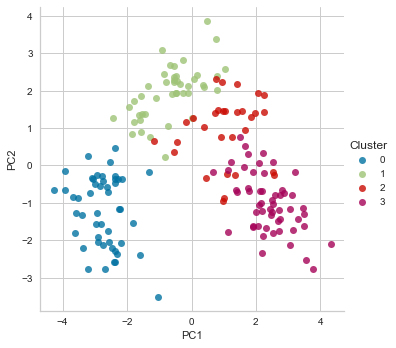

In [97]:
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', fit_reg=False);